## PREDICTING CUSTOMER CHURN AT SYRIATEL

### INTRODUCTION

OVERVIEW

Syriatel is a Telecommunication company providing mobile network services in Syria.The objective of this project is to build a classifier that predicts whether a customer will  stop doing business with SyriaTel.Our primary goal is to  build a classification model that accurately identifies customers who are likely to churn, allowing the business to take measures to retain them.


### DATA UNDERSTANDING

The data contains various features that we shall analyze to predict whether a customer would continue using Syriatel services or would churn. 
The target variable, churn, is a binary categorical variable where:
`True`:indicates the customer churned 
`False`:indicates the customer did not churn.

BUSINESS PROBLEM

The business problem is to Predict whether a customer will churn soon stop doing business with SyriaTel.
By identifying the patterns and factors that lead to churn, SyriaTel can implement targeted retention strategies, improve overall customer satisfaction, and reduce the financial impact of losing customers



In [52]:
#1.1 importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [53]:
df = pd.read_csv("data/syriatel_customer_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [54]:
1.2 # Display the first 10 rows of the dataset
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [55]:
df.shape

(3333, 21)

In [56]:
# Display the last 10 rows of the dataset
df.tail(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [57]:
1.3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [58]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


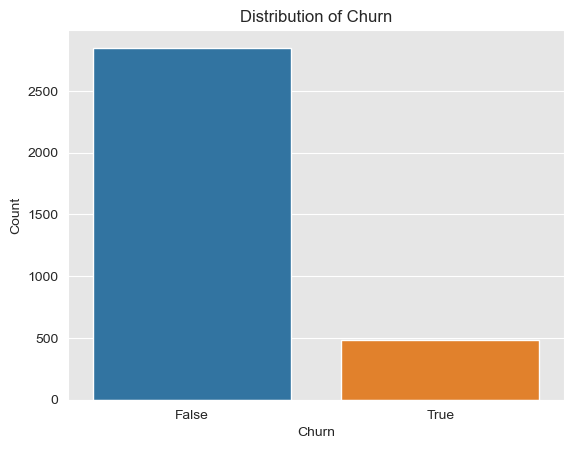

In [59]:
# Distribution of Churn to understand the proportion of customers who have churned vices those who haven't churned

sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### DATA PREPARATION

In [60]:
from sklearn.model_selection import train_test_split

y = df["churn"]
X = df.drop(columns=["churn"], axis=1)

seed = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [61]:
y_train.value_counts()

churn
False    1986
True      347
Name: count, dtype: int64

In [62]:
y_train = y_train.astype(int)

In [63]:
y_train.value_counts()

churn
0    1986
1     347
Name: count, dtype: int64

Separating  variables in `X_train`

In [64]:
X_train_cat = ['international plan', 'voice mail plan']
X_train_cont = df.columns[4:-1].difference(X_train_cat)

We have dropped the columns of area code,phone number ,state and account length since they have no major impact in determining oir target

In [65]:
# transforming categorical variables
X_train_cat_ohe = pd.get_dummies(X_train[X_train_cat], prefix=X_train_cat, drop_first=True)
X_train_cat_ohe.head()

,international plan_yes,voice mail plan_yes
2403,False,False
87,False,False
3180,True,False
3266,False,True
3055,False,False


In [66]:
# correlations
X_train_cont_df = X_train.loc[:, X_train_cont]
X_train_cont_df.head()

,customer service calls,number vmail messages,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
2403,2,0,109,15.62,91.9,111,16.86,198.4,7,3.51,13.0,125,7.73,171.7
87,1,0,118,36.43,214.3,76,17.72,208.5,2,3.24,12.0,98,8.21,182.4
3180,1,0,115,25.81,151.8,116,8.81,103.6,4,3.29,12.2,86,7.03,156.3
3266,3,33,139,26.38,155.2,79,22.81,268.3,4,2.62,9.7,71,8.39,186.4
3055,2,0,80,29.82,175.4,127,16.78,197.4,2,2.62,9.7,102,8.47,188.2


In [67]:
abs(X_train_cont_df.corr()) > 0.75

,customer service calls,number vmail messages,total day calls,total day charge,total day minutes,total eve calls,total eve charge,total eve minutes,total intl calls,total intl charge,total intl minutes,total night calls,total night charge,total night minutes
customer service calls,True,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,True,False,False,False,False,False,False,False,False,False,False,False,False
total day calls,False,False,True,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,False,True,True,False,False,False,False,False,False,False,False,False
total day minutes,False,False,False,True,True,False,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,True,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,False,True,True,False,False,False,False,False,False
total eve minutes,False,False,False,False,False,False,True,True,False,False,False,False,False,False
total intl calls,False,False,False,False,False,False,False,False,True,False,False,False,False,False
total intl charge,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [68]:
df_corr = X_train_cont_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


We choose to drop the ```charge``` features as they can be seen to be very strongly correlated with the ```minutes``` features.

In [69]:
to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
X_train_cont = df.columns[4:-1].difference(X_train_cat + to_drop)
X_train_cont

Index(['customer service calls', 'number vmail messages', 'total day calls',
       'total day minutes', 'total eve calls', 'total eve minutes',
       'total intl calls', 'total intl minutes', 'total night calls',
       'total night minutes'],
      dtype='object')

We then scale continious variables.

In [70]:
X_train_cont_df = X_train.loc[:, X_train_cont]
X_train_cont_df.head()

,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
2403,2,0,109,91.9,111,198.4,7,13.0,125,171.7
87,1,0,118,214.3,76,208.5,2,12.0,98,182.4
3180,1,0,115,151.8,116,103.6,4,12.2,86,156.3
3266,3,33,139,155.2,79,268.3,4,9.7,71,186.4
3055,2,0,80,175.4,127,197.4,2,9.7,102,188.2


Data Cleaning

In [71]:
# Check for duplicates.
df.duplicated()
#df.loc[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [72]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

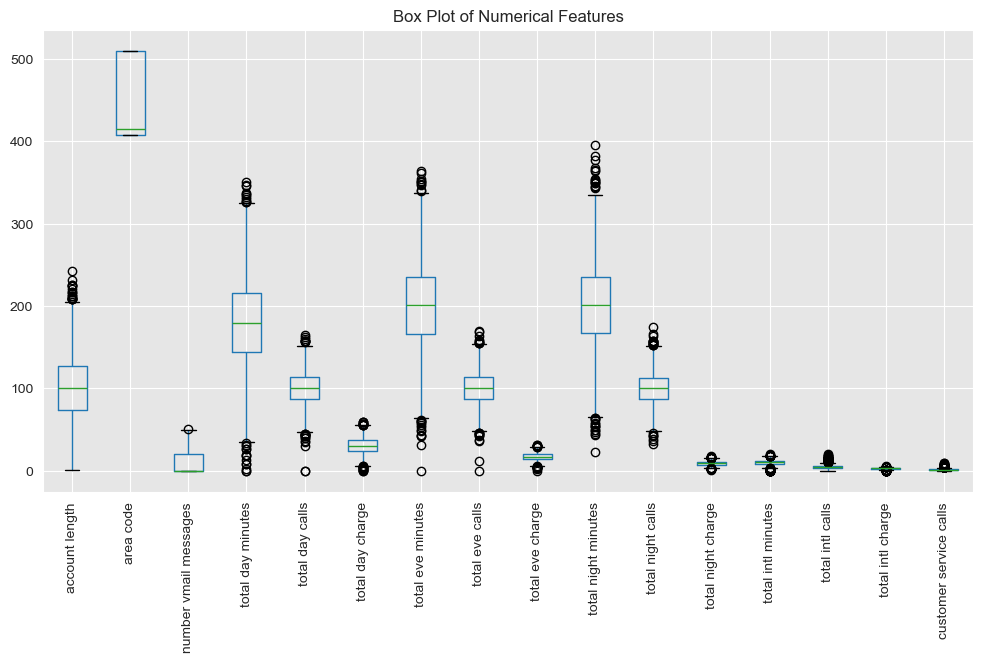

In [73]:
# Box plot for the outliers

X.boxplot(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:

scaler.fit(X_train_cont_df)
X_train_cont_scaled = scaler.transform(X_train_cont_df)
X_train_cont_scaled

array([[ 0.34443674, -0.59004295,  0.43843642, ...,  0.9741809 ,
         1.25617566, -0.57860761],
       [-0.42379549, -0.59004295,  0.88816037, ...,  0.62048184,
        -0.11402575, -0.36640043],
       [-0.42379549, -0.59004295,  0.73825239, ...,  0.69122165,
        -0.72300415, -0.8840273 ],
       ...,
       [ 1.11266898, -0.59004295,  0.63831373, ..., -0.47598524,
         0.69794546, -0.14427702],
       [-0.42379549, -0.59004295,  0.83819104, ..., -0.08691628,
         1.05318286, -0.80271427],
       [ 0.34443674, -0.59004295,  1.08803769, ..., -0.47598524,
        -0.67225595, -0.61827251]])

In [76]:
X_train_cont_scaled_df = pd.DataFrame(
    X_train_cont_scaled, index=X_train_cont_df.index, columns=X_train_cont_df.columns)

In [77]:
# Combining the preprocessed continuous and categorical data into one data frame
X_train_preprocessed = pd.concat([X_train_cat_ohe, X_train_cont_scaled_df], axis=1)
X_train_preprocessed.head()

,international plan_yes,voice mail plan_yes,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
2403,False,False,0.344437,-0.590043,0.438436,-1.559802,0.539219,-0.064116,1.008057,0.974181,1.256176,-0.578608
87,False,False,-0.423795,-0.590043,0.888160,0.636415,-1.220078,0.134515,-1.014124,0.620482,-0.114026,-0.366400
3180,True,False,-0.423795,-0.590043,0.738252,-0.485019,0.790547,-1.928493,-0.205252,0.691222,-0.723004,-0.884027
3266,False,True,1.112669,1.823838,1.937516,-0.424013,-1.069281,1.310567,-0.205252,-0.193026,-1.484227,-0.287071
3055,False,False,0.344437,-0.590043,-1.010674,-0.061566,1.343469,-0.083783,-1.014124,-0.193026,0.088967,-0.251372


In [78]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2403 to 2656
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan_yes  2333 non-null   bool   
 1   voice mail plan_yes     2333 non-null   bool   
 2   customer service calls  2333 non-null   float64
 3   number vmail messages   2333 non-null   float64
 4   total day calls         2333 non-null   float64
 5   total day minutes       2333 non-null   float64
 6   total eve calls         2333 non-null   float64
 7   total eve minutes       2333 non-null   float64
 8   total intl calls        2333 non-null   float64
 9   total intl minutes      2333 non-null   float64
 10  total night calls       2333 non-null   float64
 11  total night minutes     2333 non-null   float64
dtypes: bool(2), float64(10)
memory usage: 205.0 KB


### MODELLING

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [80]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=seed)
dt.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2024)

In [81]:
# lets use AUC metric to check the predictive performance
y_hat_train = dt.predict(X_train_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_hat_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

The cell below shows an AUC of 1.0 indicates that the classifier has perfect performance on the training data, which might be a sign of overfitting or an indication of very good model performance.

In [82]:
# preprocessing test data
y_test = y_test.astype(int)

X_test_cat = ["international plan", "voice mail plan"]
X_test_cont = X_train_cont

X_test_cat_ohe = pd.get_dummies(X_test[X_test_cat], prefix=X_test_cat, drop_first=True)

X_test_cont_df = X_test.loc[:, X_test_cont]
X_test_cont_scaled = scaler.transform(X_test_cont_df)

X_test_cont_scaled_df = pd.DataFrame(
    X_test_cont_scaled, index=X_test_cont_df.index, columns=X_test_cont_df.columns)

X_test_preprocessed = pd.concat([X_test_cat_ohe, X_test_cont_scaled_df], axis=1)
X_test_preprocessed

,international plan_yes,voice mail plan_yes,customer service calls,number vmail messages,total day calls,total day minutes,total eve calls,total eve minutes,total intl calls,total intl minutes,total night calls,total night minutes
1452,False,False,0.344437,-0.590043,1.787608,-0.608826,0.740282,-0.990405,-0.609688,0.726592,-1.382731,1.021871
391,False,False,-1.192028,-0.590043,1.437823,-1.313983,1.444001,1.111936,-0.609688,-0.546725,-1.179738,0.242456
2090,False,True,0.344437,2.116429,0.188590,0.801490,-0.063969,0.657642,0.199184,0.125303,-0.520011,-1.205313
230,True,False,-1.192028,-0.590043,0.438436,2.389440,-0.013703,-1.421100,-1.014124,0.089933,-1.331983,0.331702
2244,False,False,-0.423795,-0.590043,-0.810797,1.084988,-0.767688,-0.117215,-0.609688,0.231413,0.190463,0.629188
...,...,...,...,...,...,...,...,...,...,...,...,...
194,False,True,-0.423795,1.092359,-2.409815,1.985724,0.539219,-0.689508,-0.205252,-0.263766,-0.621508,-1.621794
2542,False,False,-0.423795,-0.590043,0.788222,1.445641,0.438688,1.338100,-0.609688,-0.263766,1.509917,-0.507211
1789,False,False,-1.192028,-0.590043,-0.510981,0.871467,1.745594,-2.526353,1.008057,-1.961521,-0.063278,-1.716990
742,False,True,2.649133,0.653471,0.588344,0.261407,1.544532,0.765807,-0.609688,0.408262,-0.114026,0.936591


In [83]:
y_pred = dt.predict(X_test_preprocessed)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8340822440087147

The AUC score of 0.834 suggests that your model has good performance, as it effectively separates the classes, but it is not perfect. If the ROC curve is computed using predicted probabilities rather than discrete labels, the result would provide a more accurate reflection of the model's performance.

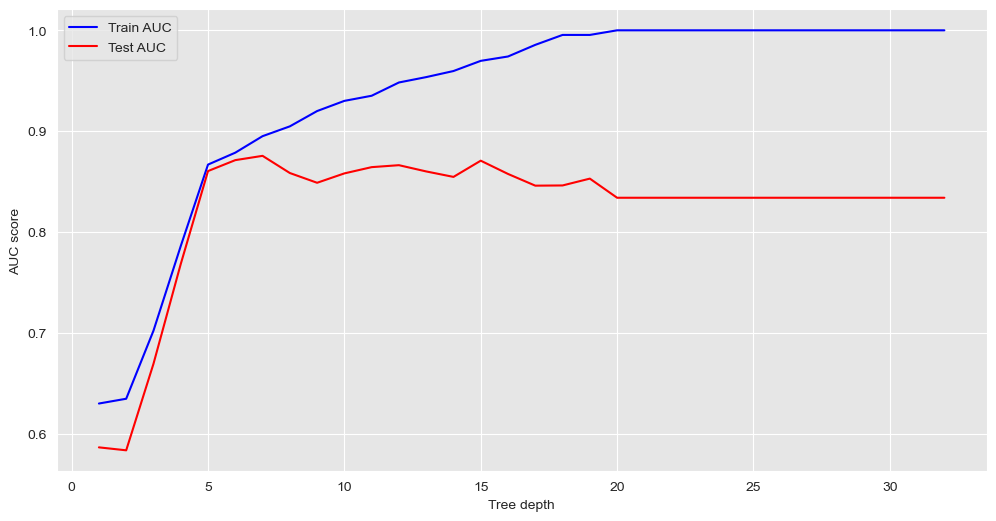

In [84]:
# Find the optimal tree depth 
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

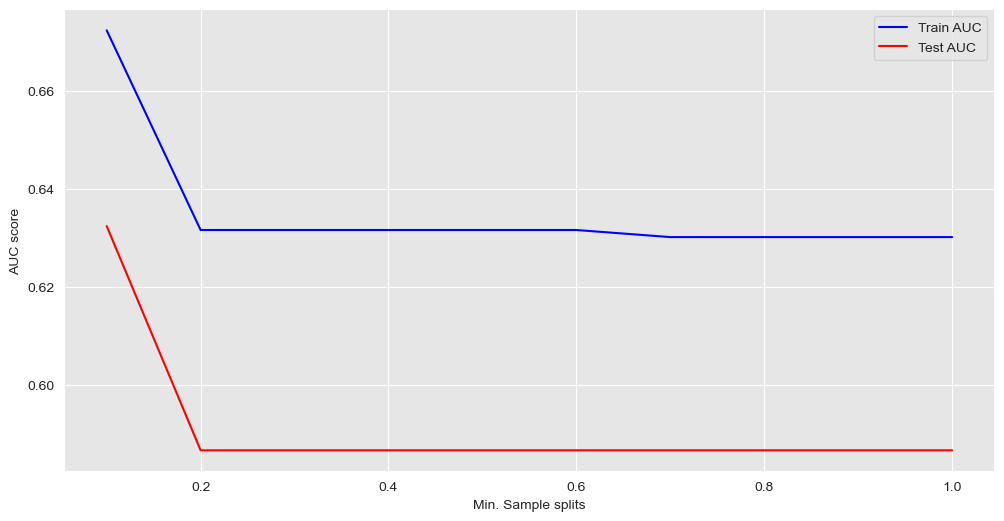

In [85]:
# Find the optimal min-samples-split 
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.ylabel('AUC score')
plt.legend()
plt.show()

The AUC score drops fast up to 0.2 minimum sample splits but levels afterwards and with no clear effect on the dataset.

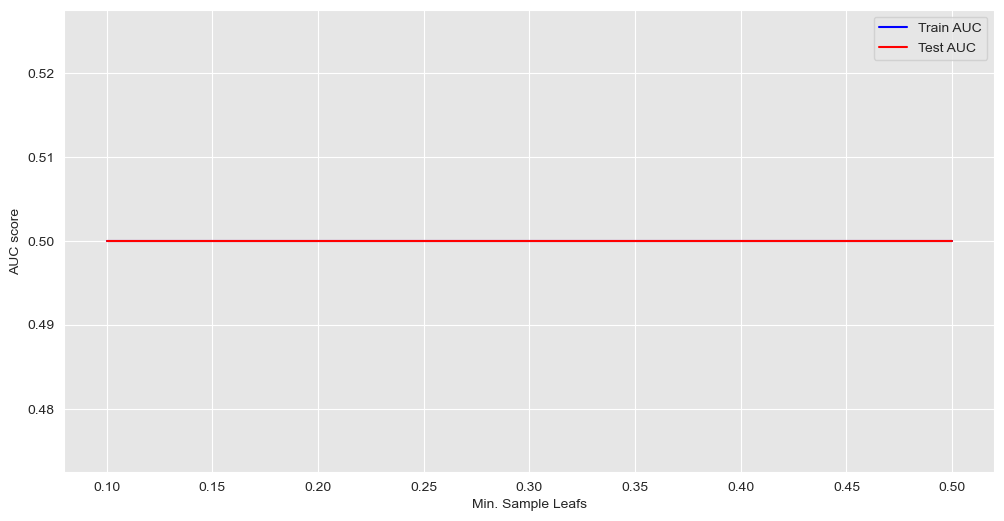

In [86]:
# Find the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

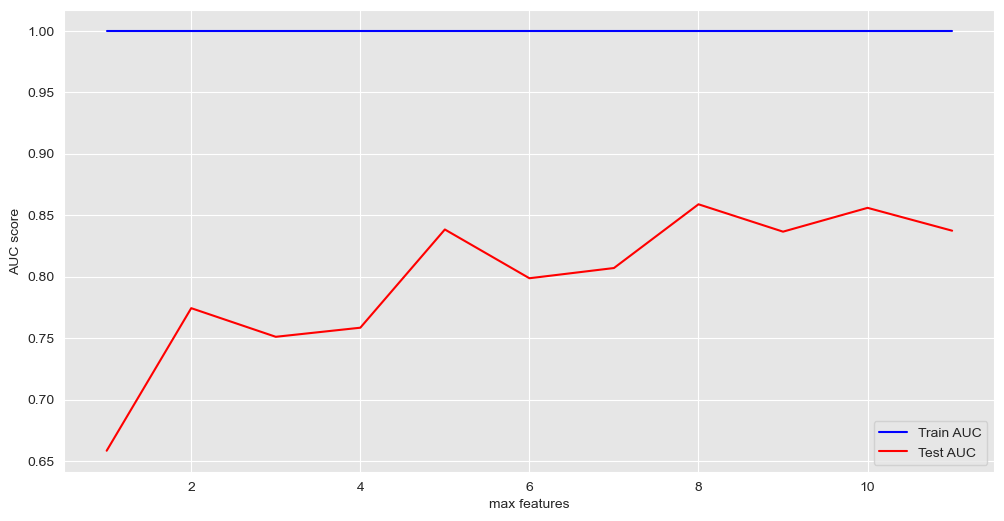

In [87]:
# Find optimal maximum feature size
max_features = list(range(1, X_train_preprocessed.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=seed)
    dt.fit(X_train_preprocessed, y_train)
    
    train_pred = dt.predict(X_train_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test_preprocessed)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The test score seems increase with fluctuations as the number of features selected increases.

In [88]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
dt.fit(X_train_preprocessed, y_train)

train_pred = dt.predict(X_train_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
train_roc_auc = auc(false_positive_rate, true_positive_rate)

y_pred = dt.predict(X_test_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)

train_roc_auc, test_roc_auc

(0.8669475957059648, 0.8605324074074073)

The Decision Tree classifier, trained with the specified parameters (criterion='entropy' and max_depth=5), achieved an AUC of approximately 0.867 on the training set and 0.861 on the test set. These AUC scores indicate that the model performs well in distinguishing between classes on both datasets, with only a slight drop from training to testing data. This suggests that the classifier is effectively generalizing from training to test data and is not significantly overfitting.

LogisticRegression

In [89]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [90]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

y_score = logreg.fit(X_train_preprocessed, y_train).decision_function(X_train_preprocessed)
fpr, tpr, thresholds = roc_curve(y_train, y_score)
print('Train AUC: {}'.format(auc(fpr, tpr)))

y_score = logreg.decision_function(X_test_preprocessed)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('Test AUC: {}'.format(auc(fpr, tpr)))

Train AUC: 0.7991168728650988
Test AUC: 0.8123127723311546


The Logistic Regression model demonstrates reasonable performance with AUC values of 0.799 on the training set and 0.812 on the test set. The AUC values indicate that the model is effective at distinguishing between classes and performs slightly better on test data, which suggests good generalization.

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
Train AUC: 0.7473350920419884
Test AUC: 0.7628421160130718
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
Train AUC: 0.7615730865336897
Test AUC: 0.7713694852941178
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
Train AUC: 0.7952018597038057
Test AUC: 0.8062193627450981
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
Train AUC: 0.7991168728650988
Test AUC: 0.8123127723311546
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
Train AUC: 0.7993258283488744
Test AUC: 0.812780841503268
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
Train AUC: 0.79936355642

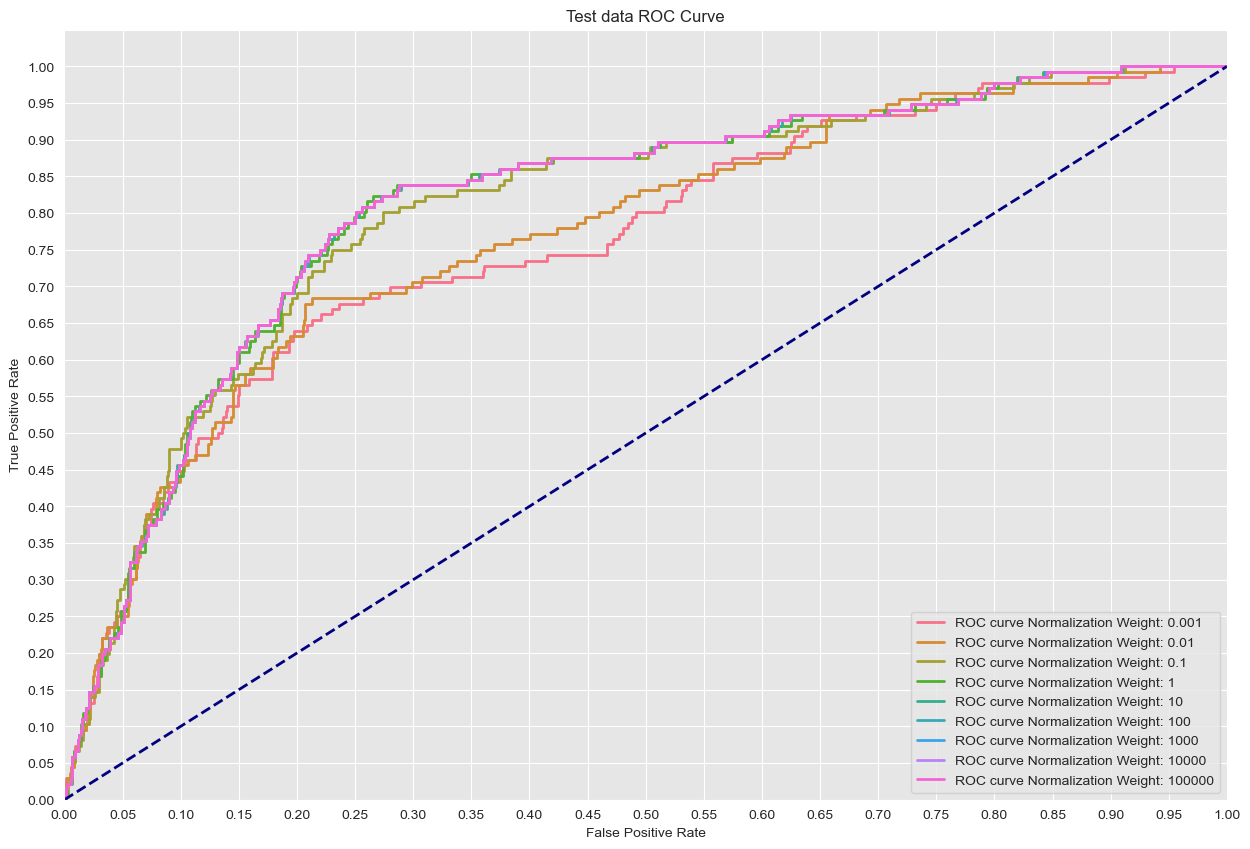

In [91]:
# Compare a different regularization levels 
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
colors = sns.color_palette("husl", 9)
plt.figure(figsize=(15, 10))

for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_preprocessed, y_train)
    print(model_log)
    
    y_score = logreg.fit(X_train_preprocessed, y_train).decision_function(X_train_preprocessed)
    fpr, tpr, thresholds = roc_curve(y_train, y_score)
    print('Train AUC: {}'.format(auc(fpr, tpr)))

    y_score = logreg.decision_function(X_test_preprocessed)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('Test AUC: {}'.format(auc(fpr, tpr)))
    
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(C_param_range[n]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show()

The results above show an optimal C reqularization value of 10, beyond which there is negligible difference in the AUC scores.

In [92]:
## class imbalance
print(y_train.value_counts()) 

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_preprocessed, y_train) 

print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

churn
0    1986
1     347
Name: count, dtype: int64


churn
0    1986
1    1986
Name: count, dtype: int64


LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.8056151279956427
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.8342184095860565
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8427542892156863
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8427457788671023
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.8427202478213507
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.8426436546840959
-------------------------------------------------------
LogisticRegression(C=1000, fit_intercept=False, solver='liblinear')
AU

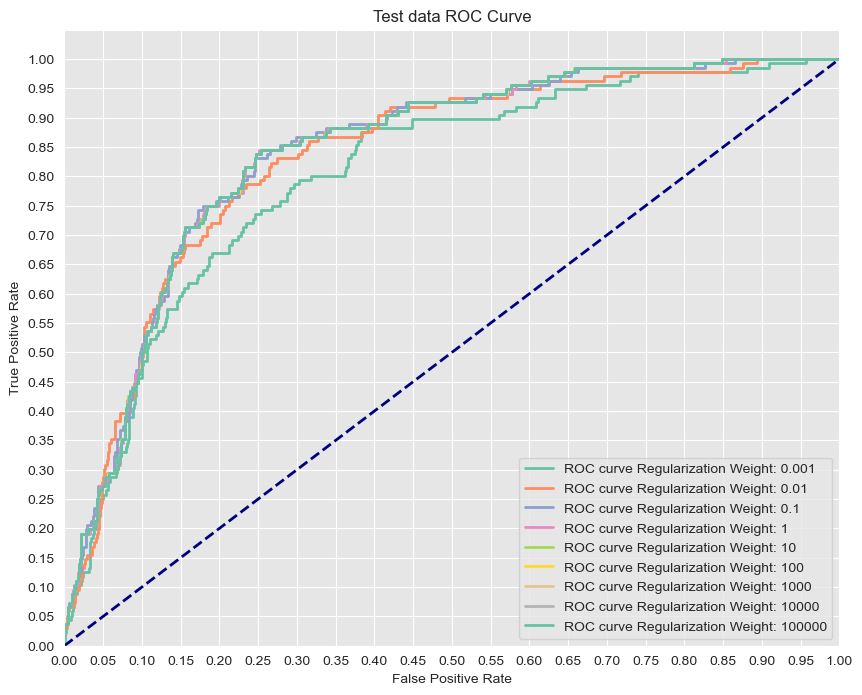

In [93]:
# Comparing different regularization performances once again
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
names = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_preprocessed)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show()

By applying SMOTE we have gotten a slight improvement in the model's performance to a test AUC score of about 0.83. 

The tuned Decision Tree model gives the best performance. 

#### Final Model

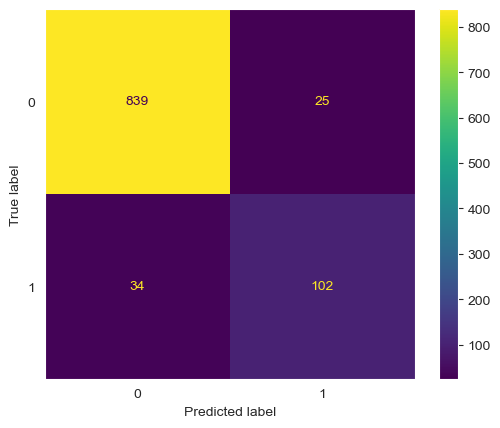

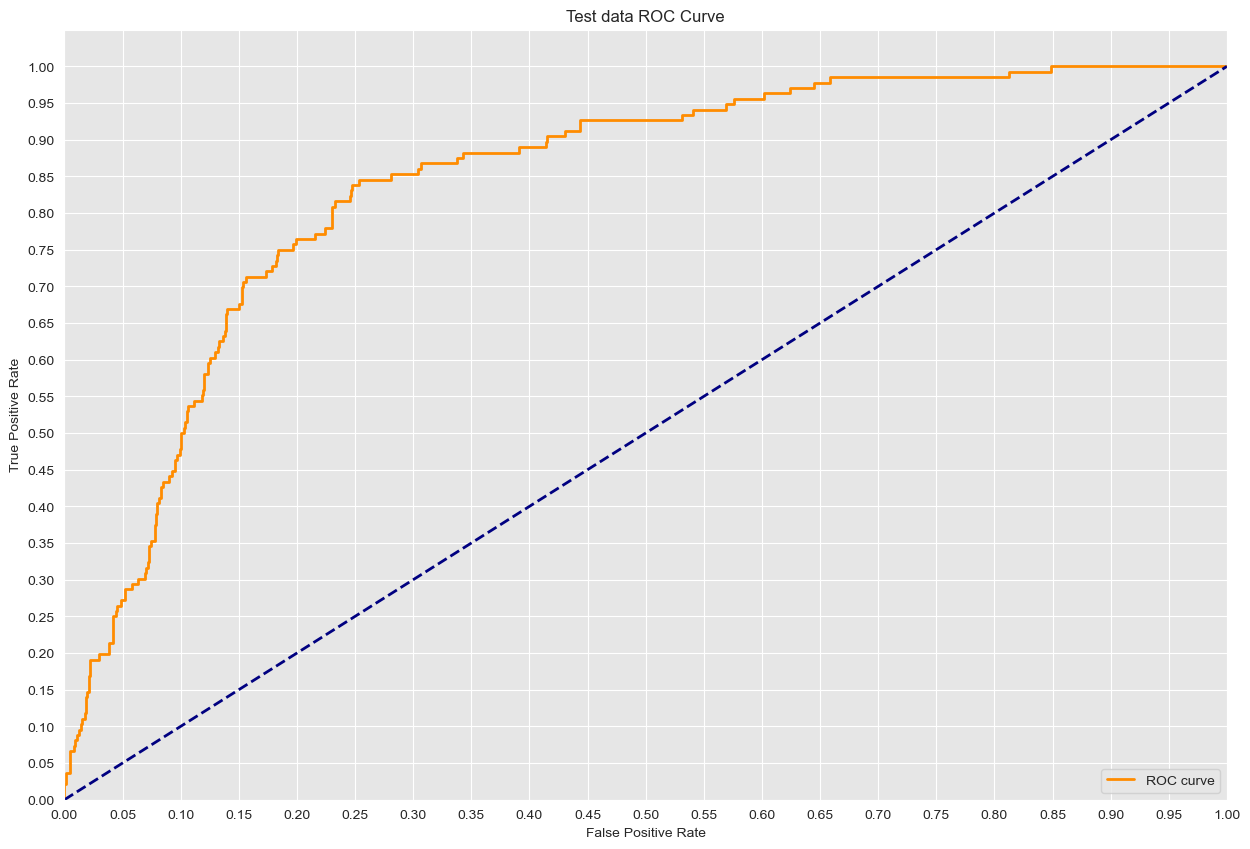

AUC: 0.8605324074074073


In [94]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
dt.fit(X_train_preprocessed, y_train)

y_pred = dt.predict(X_test_preprocessed)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
test_roc_auc = auc(false_positive_rate, true_positive_rate)

# Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.grid(False)
plt.show()

# plot ROC curve
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve')
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test data ROC Curve')
plt.legend(loc='lower right')
plt.show();

print(f'AUC: {test_roc_auc}')

In [95]:
# Accuracy score
from sklearn.metrics import accuracy_score

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.941


### EVALUATION

The final model generated above following an iterative approach of trying to improve previous model performances shows a good AUC score of 0.86 on the test data. Its accuracy score on "unseen" test data means that 94% of the time, this model will give the correct prediction on whether a customer would churn or not. Given the business problem of trying to catch customers likely to churn so as to incentivize them, this model adequately addresses that need. Syriatel will be able to use this model to predict from customer mobile services usage the likelihood of a customer dropping them albeit occasional false positives and false negatives. 

RECOMMENDATIONS

# Improve Customer Service and Experience Quality

By Understanding Customer Expectations

Gather Feedback: Use surveys, reviews, and direct feedback to understand what customers expect from your service.
Analyze Data: Look at customer behavior and preferences to identify trends and common issues.

 Enhance Communication Channels
Multi-Channel Support: Provide multiple ways for customers to reach you (e.g., phone, email, live chat, social media).
Responsiveness: Ensure quick and effective responses to customer inquiries and issues.

## Identify and Strengthen Relationships with  Customers

Identify: Recognize who your customers are, including their preferences, behaviors, and needs. This might involve collecting and analyzing data from various sources such as customer feedback, purchase history, and interaction logs.

Strengthen Relationships: Build and maintain strong, positive connections with your customers. This could involve personalized communication, loyalty programs, or offering exceptional support. The goal is to make customers feel valued and understood, enhancing their overall experience with your brand.

## Focus on At-Risk Customers

At-Risk Customers: These are customers who are likely to churn or disengage from your business. Identifying them early is crucial. They might show signs of dissatisfaction or reduced engagement.

Focus: Implement strategies to re-engage these customers. This could involve personalized offers, special attention from customer service, or resolving issues that are causing dissatisfaction. The aim is to address their concerns and prevent them from leaving.


## Design Targeted Marketing Campaigns

Targeted Marketing: Create marketing campaigns that are specifically tailored to different customer segments based on their interests, behaviors, or demographics.

Design: Develop campaigns that speak directly to the needs and preferences of these segments. This could involve personalized emails, targeted ads, or special promotions. The goal is to make your marketing efforts more effective by reaching the right people with the right message.

## Allocate Resources Efficiently

Allocate Resources: Ensure that your time, money, and personnel are being used in the most effective way possible.

Efficiently: This involves prioritizing areas that have the highest impact on customer satisfaction and experience. For instance, investing in training for customer service reps, improving technology for better customer interaction, or focusing marketing efforts where they yield the most return. The goal is to optimize resource use to maximize customer satisfaction and business outcomes.

## Regularly Review Model Performance

Review Model Performance: Assess how well your strategies and systems are performing in terms of improving customer service and experience.

Regularly: Conduct these reviews on a consistent basis to ensure that your approaches are still effective and relevant. This might involve analyzing customer feedback, tracking key performance indicators (KPIs), or reviewing service metrics. The goal is to make data-driven adjustments and improvements to continually enhance the quality of service and customer experience.

FURTHER STEPS

## Regularly monitor the performance of both the decision tree and logistic regression models ensuring that models remain accurate and relevant.

Performance Monitoring: Continuously evaluate how well your models are performing. This involves checking metrics such as accuracy, precision, recall, F1 score, and AUC (Area Under the Curve) for classification tasks, or metrics like RMSE (Root Mean Squared Error) for regression tasks.

Model Drift: Over time, the underlying data patterns may change (a phenomenon known as concept drift), which can affect model performance. Regular monitoring helps detect these changes early.

Model Relevance: Ensure that both the decision tree and logistic regression models remain relevant by comparing their predictions with actual outcomes and adjusting as necessary.


## Focusing on top Features for business recommendations.

Feature Importance: Identify which features (variables) are most influential in your models’ predictions. For decision trees, feature importance can be derived directly from the model’s structure. For logistic regression, it involves looking at the coefficients of the features.

Top Features: Prioritize the features that have the most significant impact on your model’s predictions. This helps in understanding what factors are driving the outcomes and can guide business decisions and recommendations.

Business Recommendations: Use insights from these top features to make informed business decisions. For example, if a feature like customer age is crucial for predicting purchase behavior, strategies could be tailored to target specific age groups.

## Continuos data improvement.

Data Quality: Regularly review and improve the quality of the data being used for modeling. This includes addressing issues such as missing values, outliers, and incorrect data.

Data Enrichment: Enhance your data by incorporating additional relevant information. This could involve integrating new data sources or refining existing ones.

Data Refresh: Update your datasets periodically to ensure they reflect current trends and patterns, helping maintain the accuracy and relevance of your models.


## Ensuring that predictive models align with business goals and provide actionable insights for decision-making.

Ensuring that your models are designed to meet business objectives and provide insights that are actionable and useful for decision-making.




Conclusion

By integrating these practices, you ensure that your predictive analytics are both robust and aligned with your business needs, ultimately driving better decision-making and achieving strategic goals.